In [ ]:
# !pip install requests
# or for conda:
# !conda install -c anaconda requests 

import requests

In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

main_URL = 'https://www.lyrics.com'
url = 'https://www.lyrics.com/artist/Cardi-B/'
    
  

In [ ]:
response = requests.get(url)
response.status_code

In [ ]:
lyrics_html = response.text

lyrics_html

In [ ]:
import re

links = re.findall('href.{100}', response.text)
links

In [ ]:
ResponseTxt=re.findall('\/lyric\/.*?(?=")',response.text)
ResponseTxt

In [ ]:
## List out the lirics of TuPac 

# for counter, link in enumerate(ResponseTxt):
#    url = 'https://www.lyrics.com' + link
#    response = requests.get(url)
#    with open(f'{counter}.txt', 'w', encoding='utf-8') as f:
#       f.write(response.text)
#    print(counter, link, response.status_code)

In [ ]:
# Get out the song lyrics/album from the website

for counter, link in enumerate(ResponseTxt):
    url = 'https://www.lyrics.com' + link
    response = requests.get(url)
    with open(f'{counter}.txt', 'w', encoding='utf-8') as f:
        f.write(response.text)
    print(url[:200])
    

In [ ]:
## Save every lyrics tile into a file

for counter, link in enumerate(ResponseTxt):
    url = 'https://www.lyrics.com/artist/Cardi-B' + link
    response = requests.get(url)
    song_title = link.split('/')[4]
    with open(f'{song_title}.txt', 'w', encoding='utf-8') as f:
        f.write(response.text)
        print(counter, song_title)
    #print(counter, song_title, response.status_code)
    
      


# Using Beautiful Soup for the same purpose as above .

   * Project Goals: Machine Leaning Algorithim for Text Extraction, Classification and Prediction of Artist 

Procedures: 
    
* Download a HTML page with links to songs

* Extract hyperlinks of song pages

* Extract the song lyrics

* Vectorize the text using Bag of Words (BoW)

* Train a classification model that predicts the artist 



In [69]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}


#### Download the text of the HTML from the website with links to songs

In [70]:
import requests
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os

In [71]:
# Artist_1: Celine-Dion

main_URL = 'https://www.lyrics.com'

url = 'https://www.lyrics.com/artist/Jay-Z/'


# Artist_2: Tupac

url_2 = 'https://www.lyrics.com/artist/Tupac-Shakur/'

In [72]:
# connect to the song server and extract data
response = requests.get(url)

response_2 = requests.get(url_2)

#### Convert the raw HTML into a BeautifulSoup object, so that the data can be easily parsed

In [73]:
JayZ_LYRICS = BeautifulSoup(response.text)

JayZ_LYRICS 

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]--><!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]--><!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]--><head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Jay-Z Lyrics, Songs and Albums | Lyrics.com</title>
<meta content="Jay-Z Lyrics - All the great songs and their lyrics from Jay-Z on Lyrics.com" name="description"/>
<meta content="Jay-Z lyrics, Jay-Z song lyrics, Jay-Z lyric" name="keywords"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<base href="https://www.lyrics.com/"/>
<script>
s4Prefix = 'https://static.stands4.com';
version = '1.3.87';
</script>
<!-- Bootstrap compiled and minified CSS -->
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.2/css/bootstrap.min.css" rel="styl

In [74]:
JayZ_LYRICS.title

<title>Jay-Z Lyrics, Songs and Albums | Lyrics.com</title>

In [75]:
Tupac_LYRICS = BeautifulSoup(response_2.text)

Tupac_LYRICS 

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]--><!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]--><!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]--><head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Tupac Shakur Lyrics, Songs and Albums | Lyrics.com</title>
<meta content="Tupac Shakur Lyrics - All the great songs and their lyrics from Tupac Shakur on Lyrics.com" name="description"/>
<meta content="Tupac Shakur lyrics, Tupac Shakur song lyrics, Tupac Shakur lyric" name="keywords"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<base href="https://www.lyrics.com/"/>
<script>
s4Prefix = 'https://static.stands4.com';
version = '1.3.87';
</script>
<!-- Bootstrap compiled and minified CSS -->
<link href="https://maxcdn.bootstrapcdn.com/bootst

In [76]:
type(JayZ_LYRICS), type(Tupac_LYRICS)


(bs4.BeautifulSoup, bs4.BeautifulSoup)

In [77]:
#  Get Cardi-B web lyric links class

links = JayZ_LYRICS.find_all(class_="tal qx")
links

[<td class="tal qx"><strong><a href="/lyric/36259550/Jay-Z/Top+Off">Top Off</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36135388/Jay-Z/Deja+Vu">Deja Vu</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36113861/Jay-Z/Big+Momma+Thang">Big Momma Thang</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36341850/Jay-Z/Diamonds+from+Sierra+Leone">Diamonds from Sierra Leone</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36341864/Jay-Z/Numb">Numb</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36400712/Jay-Z/Mood+4+Eva">Mood 4 Eva</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36255363/Jay-Z/Crazy+in+Love">Crazy in Love</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/35121895/Jay-Z/The+Story+of+O.J.">The Story of O.J.</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/35737031/Jay-Z/What%27s+Free">What's Free</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/35334

In [78]:
#  Get Tupac web lyric links class

links2 = Tupac_LYRICS.find_all(class_="tal qx")
links2

    

[<td class="tal qx"><strong><a href="/lyric/31389663/Tupac+Shakur/Me+%26+My+Homies">Me &amp; My Homies</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/30296239/Tupac+Shakur/Me+%26+My+Homies">Me &amp; My Homies</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/28932186/Tupac+Shakur/California+Love">California Love</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/17928910/Tupac+Shakur/California+Love">California Love</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/17928917/Tupac+Shakur/I+Ain%27t+Mad+At+Cha">I Ain't Mad At Cha</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/17928920/Tupac+Shakur/2+of+Amerikaz+Most+Wanted">2 of Amerikaz Most Wanted</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/17928932/Tupac+Shakur/All+Eyez+On+Me">All Eyez On Me</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/16086966/Tupac+Shakur/Livin+in+Pain">Livin in Pain</a></strong></td>,
 <td class="tal qx"><stron

In [79]:
#for link in Cardi_LYRICS.find_all(class_="tal qx"):
 #   for album in link.find_all('a'):
  #      print(album.get('href'))



In [80]:
#for link in Tupac_LYRICS.find_all(class_="tal qx"):
 #   for album in link.find_all('a'):
  #      print(album.get('href'))

In [81]:
# loop every link to extract the each song lyrics urls for Cardi-B

lyrik=[]

for i in links:
    
    lyric_URL_link = i.a['href']
    
    song_URL = main_URL + lyric_URL_link
   
    lyrik.append(song_URL)
    
    print(song_URL)
    

https://www.lyrics.com/lyric/36259550/Jay-Z/Top+Off
https://www.lyrics.com/lyric/36135388/Jay-Z/Deja+Vu
https://www.lyrics.com/lyric/36113861/Jay-Z/Big+Momma+Thang
https://www.lyrics.com/lyric/36341850/Jay-Z/Diamonds+from+Sierra+Leone
https://www.lyrics.com/lyric/36341864/Jay-Z/Numb
https://www.lyrics.com/lyric/36400712/Jay-Z/Mood+4+Eva
https://www.lyrics.com/lyric/36255363/Jay-Z/Crazy+in+Love
https://www.lyrics.com/lyric/35121895/Jay-Z/The+Story+of+O.J.
https://www.lyrics.com/lyric/35737031/Jay-Z/What%27s+Free
https://www.lyrics.com/lyric/35334231/Jay-Z/Hustlin%27
https://www.lyrics.com/lyric/35125500/Jay-Z/Frontin%27
https://www.lyrics.com/lyric/35221943/Jay-Z/Apeshit
https://www.lyrics.com/lyric/35149240/Jay-Z/Nice
https://www.lyrics.com/lyric/35149241/Jay-Z/713
https://www.lyrics.com/lyric/35149233/Jay-Z/Heard+About+Us
https://www.lyrics.com/lyric/35221937/Jay-Z/Black+Effect
https://www.lyrics.com/lyric/35149235/Jay-Z/Lovehappy
https://www.lyrics.com/lyric/35237768/Jay-Z/Summer
htt

https://www.lyrics.com/lyric/15560099/Jay-Z/Heart+of+the+City+%28Ain%27t+No+Love%29
https://www.lyrics.com/lyric/15560100/Jay-Z/Never+Change
https://www.lyrics.com/lyric/15560101/Jay-Z/Song+Cry
https://www.lyrics.com/lyric/15560102/Jay-Z/All+I+Need
https://www.lyrics.com/lyric/15560103/Jay-Z/Renegade
https://www.lyrics.com/lyric/15560104/Jay-Z/Blueprint+%28Momma+Loves+Me%29
https://www.lyrics.com/lyric/15560105/Jay-Z/Lyrical+Exercise
https://www.lyrics.com/lyric/15560106/Jay-Z/Girls%2C+Girls%2C+Girls%2C+Pt.+2
https://www.lyrics.com/lyric/15560153/Jay-Z/The+Ruler%27s+Back
https://www.lyrics.com/lyric/15560154/Jay-Z/Takeover
https://www.lyrics.com/lyric/15560155/Jay-Z/Izzo+%28H.O.V.A.%29
https://www.lyrics.com/lyric/15560156/Jay-Z/Girls%2C+Girls%2C+Girls
https://www.lyrics.com/lyric/15560157/Jay-Z/Jigga+That+Nigga
https://www.lyrics.com/lyric/15560158/Jay-Z/U+Don%27t+Know
https://www.lyrics.com/lyric/15560159/Jay-Z/Hola%27+Hovito
https://www.lyrics.com/lyric/15560160/Jay-Z/Heart+of+the+C

In [82]:
# loop every link to extract the each song lyrics urls for Tupac

lyrik2=[]

for j in links2:
    
    lyric_URL_link2 = j.a['href']
    
    song_URL2 = main_URL + lyric_URL_link2
    
     
    lyrik2.append(song_URL2)
    
    print(song_URL2)
    
    

https://www.lyrics.com/lyric/31389663/Tupac+Shakur/Me+%26+My+Homies
https://www.lyrics.com/lyric/30296239/Tupac+Shakur/Me+%26+My+Homies
https://www.lyrics.com/lyric/28932186/Tupac+Shakur/California+Love
https://www.lyrics.com/lyric/17928910/Tupac+Shakur/California+Love
https://www.lyrics.com/lyric/17928917/Tupac+Shakur/I+Ain%27t+Mad+At+Cha
https://www.lyrics.com/lyric/17928920/Tupac+Shakur/2+of+Amerikaz+Most+Wanted
https://www.lyrics.com/lyric/17928932/Tupac+Shakur/All+Eyez+On+Me
https://www.lyrics.com/lyric/16086966/Tupac+Shakur/Livin+in+Pain
https://www.lyrics.com/lyric/27103906/Tupac+Shakur/Pac%27s+Life
https://www.lyrics.com/lyric/27103911/Tupac+Shakur/Dumpin%27
https://www.lyrics.com/lyric/27103900/Tupac+Shakur/Playa+Cardz+Right+%28Female%29
https://www.lyrics.com/lyric/27103901/Tupac+Shakur/Whatz+Next
https://www.lyrics.com/lyric/27103904/Tupac+Shakur/Sleep
https://www.lyrics.com/lyric/27103907/Tupac+Shakur/International
https://www.lyrics.com/lyric/27103903/Tupac+Shakur/Don%27t+

In [83]:

# To remove certain characters (e.g. []) from the Cardi-B lyric links

song_links = []

song_names = []

for link in lyrik:
    seperate_name = link.split("%27")[0].strip()
    if seperate_name not in song_names:
        song_links.append(link)
        song_names.append(seperate_name)
song_links
#song_links

['https://www.lyrics.com/lyric/36259550/Jay-Z/Top+Off',
 'https://www.lyrics.com/lyric/36135388/Jay-Z/Deja+Vu',
 'https://www.lyrics.com/lyric/36113861/Jay-Z/Big+Momma+Thang',
 'https://www.lyrics.com/lyric/36341850/Jay-Z/Diamonds+from+Sierra+Leone',
 'https://www.lyrics.com/lyric/36341864/Jay-Z/Numb',
 'https://www.lyrics.com/lyric/36400712/Jay-Z/Mood+4+Eva',
 'https://www.lyrics.com/lyric/36255363/Jay-Z/Crazy+in+Love',
 'https://www.lyrics.com/lyric/35121895/Jay-Z/The+Story+of+O.J.',
 'https://www.lyrics.com/lyric/35737031/Jay-Z/What%27s+Free',
 'https://www.lyrics.com/lyric/35334231/Jay-Z/Hustlin%27',
 'https://www.lyrics.com/lyric/35125500/Jay-Z/Frontin%27',
 'https://www.lyrics.com/lyric/35221943/Jay-Z/Apeshit',
 'https://www.lyrics.com/lyric/35149240/Jay-Z/Nice',
 'https://www.lyrics.com/lyric/35149241/Jay-Z/713',
 'https://www.lyrics.com/lyric/35149233/Jay-Z/Heard+About+Us',
 'https://www.lyrics.com/lyric/35221937/Jay-Z/Black+Effect',
 'https://www.lyrics.com/lyric/35149235/Jay-

In [84]:
# To remove certain characters (e.g. []) from the Tupac lyric links

song_links2 = []

song_names2 = []

for link in lyrik2:
    seperate_name2 = link.split("%27")[0].strip()
    if seperate_name2 not in song_names2:
        song_links2.append(link)
        song_names2.append(seperate_name2)
song_links2

['https://www.lyrics.com/lyric/31389663/Tupac+Shakur/Me+%26+My+Homies',
 'https://www.lyrics.com/lyric/30296239/Tupac+Shakur/Me+%26+My+Homies',
 'https://www.lyrics.com/lyric/28932186/Tupac+Shakur/California+Love',
 'https://www.lyrics.com/lyric/17928910/Tupac+Shakur/California+Love',
 'https://www.lyrics.com/lyric/17928917/Tupac+Shakur/I+Ain%27t+Mad+At+Cha',
 'https://www.lyrics.com/lyric/17928920/Tupac+Shakur/2+of+Amerikaz+Most+Wanted',
 'https://www.lyrics.com/lyric/17928932/Tupac+Shakur/All+Eyez+On+Me',
 'https://www.lyrics.com/lyric/16086966/Tupac+Shakur/Livin+in+Pain',
 'https://www.lyrics.com/lyric/27103906/Tupac+Shakur/Pac%27s+Life',
 'https://www.lyrics.com/lyric/27103911/Tupac+Shakur/Dumpin%27',
 'https://www.lyrics.com/lyric/27103900/Tupac+Shakur/Playa+Cardz+Right+%28Female%29',
 'https://www.lyrics.com/lyric/27103901/Tupac+Shakur/Whatz+Next',
 'https://www.lyrics.com/lyric/27103904/Tupac+Shakur/Sleep',
 'https://www.lyrics.com/lyric/27103907/Tupac+Shakur/International',
 'h

In [85]:
L1=song_links[:40]
#L1

In [86]:
L2=song_links2[:40]
#L2

In [87]:
# This code remove double or duplicate lyrics

my_set = set()
my_list= []
for x in L1:
    y = x.split('/')[-1]
    if y not in my_set:
        my_list.append(x)
        my_set.add(y)
        
       

In [88]:
my_set2 = set()
my_list2 = []
for xi in L2:
    yi = xi.split('/')[-1]
    if yi not in my_set2:
        my_list2.append(xi)
        my_set2.add(yi)
        
# len(my_list2) # for the length

In [89]:
my_list=my_list[:20]
my_list

['https://www.lyrics.com/lyric/36259550/Jay-Z/Top+Off',
 'https://www.lyrics.com/lyric/36135388/Jay-Z/Deja+Vu',
 'https://www.lyrics.com/lyric/36113861/Jay-Z/Big+Momma+Thang',
 'https://www.lyrics.com/lyric/36341850/Jay-Z/Diamonds+from+Sierra+Leone',
 'https://www.lyrics.com/lyric/36341864/Jay-Z/Numb',
 'https://www.lyrics.com/lyric/36400712/Jay-Z/Mood+4+Eva',
 'https://www.lyrics.com/lyric/36255363/Jay-Z/Crazy+in+Love',
 'https://www.lyrics.com/lyric/35121895/Jay-Z/The+Story+of+O.J.',
 'https://www.lyrics.com/lyric/35737031/Jay-Z/What%27s+Free',
 'https://www.lyrics.com/lyric/35334231/Jay-Z/Hustlin%27',
 'https://www.lyrics.com/lyric/35125500/Jay-Z/Frontin%27',
 'https://www.lyrics.com/lyric/35221943/Jay-Z/Apeshit',
 'https://www.lyrics.com/lyric/35149240/Jay-Z/Nice',
 'https://www.lyrics.com/lyric/35149241/Jay-Z/713',
 'https://www.lyrics.com/lyric/35149233/Jay-Z/Heard+About+Us',
 'https://www.lyrics.com/lyric/35221937/Jay-Z/Black+Effect',
 'https://www.lyrics.com/lyric/35149235/Jay-

In [90]:
my_list2=my_list2[:20]
my_list2

['https://www.lyrics.com/lyric/31389663/Tupac+Shakur/Me+%26+My+Homies',
 'https://www.lyrics.com/lyric/28932186/Tupac+Shakur/California+Love',
 'https://www.lyrics.com/lyric/17928917/Tupac+Shakur/I+Ain%27t+Mad+At+Cha',
 'https://www.lyrics.com/lyric/17928920/Tupac+Shakur/2+of+Amerikaz+Most+Wanted',
 'https://www.lyrics.com/lyric/17928932/Tupac+Shakur/All+Eyez+On+Me',
 'https://www.lyrics.com/lyric/16086966/Tupac+Shakur/Livin+in+Pain',
 'https://www.lyrics.com/lyric/27103906/Tupac+Shakur/Pac%27s+Life',
 'https://www.lyrics.com/lyric/27103911/Tupac+Shakur/Dumpin%27',
 'https://www.lyrics.com/lyric/27103900/Tupac+Shakur/Playa+Cardz+Right+%28Female%29',
 'https://www.lyrics.com/lyric/27103901/Tupac+Shakur/Whatz+Next',
 'https://www.lyrics.com/lyric/27103904/Tupac+Shakur/Sleep',
 'https://www.lyrics.com/lyric/27103907/Tupac+Shakur/International',
 'https://www.lyrics.com/lyric/27103903/Tupac+Shakur/Don%27t+Sleep',
 'https://www.lyrics.com/lyric/27103909/Tupac+Shakur/Soon+as+I+Get+Home',
 'h

In [91]:
for link in my_list:
    response = requests.get(link, headers=headers).text
    songs_soup = BeautifulSoup(response, 'html.parser')
    lyrics = songs_soup.find(class_='lyric-body').text
    song_title = link.split('/')[6].replace("+", " ")
    song_title = song_title.split('/')[0].replace("%27", "'")
    song_title = song_title.split('/')[0].replace("%5B%2A%5D", " ")
    song_title = song_title.split('/')[0].replace("%3", " ")
    with open(f'{song_title}.txt', 'w', encoding='utf-8') as f:
        f.write(lyrics)
        print(song_title)


Top Off
Deja Vu
Big Momma Thang
Diamonds from Sierra Leone
Numb
Mood 4 Eva
Crazy in Love
The Story of O.J.
What's Free
Hustlin'
Frontin'
Apeshit
Nice
713
Heard About Us
Black Effect
Lovehappy
Summer
Boss
Friends


In [92]:

for link in my_list2:
    
    response = requests.get(link, headers=headers).text
    songs_soup = BeautifulSoup(response, 'html.parser')
    lyrics = songs_soup.find(class_='lyric-body').text
    song_title = link.split('/')[6].replace("+", " ")
    song_title = song_title.split('/')[0].replace("%27", "'")
    song_title = song_title.split('/')[0].replace("%C3%AD", " ")
    song_title = song_title.split('/')[0].replace("%26", "&")
    song_title = song_title.split('/')[0].replace("%28", "(")
    song_title = song_title.split('/')[0].replace("%29", ")")
    song_title = song_title.split('/')[0].replace("%5B", "(")
    song_title = song_title.split('/')[0].replace("%5D", ")")
    with open(f'{song_title}.txt', 'w', encoding='utf-8') as f:
        f.write(lyrics)
        print(song_title)

Me & My Homies
California Love
I Ain't Mad At Cha
2 of Amerikaz Most Wanted
All Eyez On Me
Livin in Pain
Pac's Life
Dumpin'
Playa Cardz Right (Female)
Whatz Next
Sleep
International
Don't Sleep
Soon as I Get Home
Playa Cardz Right (Male)
Don't Stop
Untouchable Swizz Beatz Remix
Static I (Remix 1)
Loyal to the Game
Me and My Homies


In [93]:
my_list=my_list[:10]

In [94]:
my_list2=my_list2[:10]

In [95]:
# Combining the 2 singers

SINGERS=my_list + my_list2
#len(SINGERS)
SINGERS

['https://www.lyrics.com/lyric/36259550/Jay-Z/Top+Off',
 'https://www.lyrics.com/lyric/36135388/Jay-Z/Deja+Vu',
 'https://www.lyrics.com/lyric/36113861/Jay-Z/Big+Momma+Thang',
 'https://www.lyrics.com/lyric/36341850/Jay-Z/Diamonds+from+Sierra+Leone',
 'https://www.lyrics.com/lyric/36341864/Jay-Z/Numb',
 'https://www.lyrics.com/lyric/36400712/Jay-Z/Mood+4+Eva',
 'https://www.lyrics.com/lyric/36255363/Jay-Z/Crazy+in+Love',
 'https://www.lyrics.com/lyric/35121895/Jay-Z/The+Story+of+O.J.',
 'https://www.lyrics.com/lyric/35737031/Jay-Z/What%27s+Free',
 'https://www.lyrics.com/lyric/35334231/Jay-Z/Hustlin%27',
 'https://www.lyrics.com/lyric/31389663/Tupac+Shakur/Me+%26+My+Homies',
 'https://www.lyrics.com/lyric/28932186/Tupac+Shakur/California+Love',
 'https://www.lyrics.com/lyric/17928917/Tupac+Shakur/I+Ain%27t+Mad+At+Cha',
 'https://www.lyrics.com/lyric/17928920/Tupac+Shakur/2+of+Amerikaz+Most+Wanted',
 'https://www.lyrics.com/lyric/17928932/Tupac+Shakur/All+Eyez+On+Me',
 'https://www.lyri

In [96]:
import requests

Coupus=[]
for songlinx in SINGERS:
    
    URLS= songlinx
    SongResponse= requests.get(URLS)
 
    Singers_LYRICS = BeautifulSoup(SongResponse.text)
    
    for title in Singers_LYRICS.find_all(class_='lyric-body'):
    
     Coupus.append(title.text)
   

In [97]:

Coupus=[s.lower() for s in Coupus]
Coupus
#len(Coupus)

['ah, all that shit real too, ahh\r\ni ain\'t gon\' stop\r\ni see the\r\ni\'m ain\'t gon\' stop\r\ni\'m ain\'t, haha\r\nwe the best music\r\n\r\ni took the top off the maybach, i took the top off\r\nanother one\r\ni took the top off the maybach, i took the top off\r\ni, i took the top off my maybach, nigga\r\ni took the top off my maybach\r\ndj khaled!\r\n\r\ni took the top off the maybach\r\ni took the top off the maybach\r\ni took the top off the maybach\r\ni took the top off the maybach\r\ni took the top off the maybach, oh\r\ni took the top off the maybach, ah\r\ni took the top off the maybach, yeah\r\ni took the top off the maybach, yeah\r\n\r\ni hear the po-po behind me, woo, ain\'t gon\' stop (rrt, skrrt)\r\ni see the po-po behind me, ain\'t gon\' stop (skrrt, skrrt)\r\ni see the po-po behind me, rrt, ain\'t gon\' stop (rrt, skrrt)\r\ni dropped the top off the maybach, f*ck these cops (rrt, rrt)\r\n\r\nv12, see ya, 12 (bye)\r\ni do the whole dash with no seatbelt\r\nscreamin\', 

In [98]:
#tokenize and lemmaztize (i.e.get lyrics cleaned up)

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import TreebankWordTokenizer ## very good tokenizer for english, considers sentence structure


CLEAN_CORPUS = []

tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()


for doc in Coupus:
    tokens = tokenizer.tokenize(text=doc)
    clean_doc = " ".join(lemmatizer.lemmatize(token) for token in tokens)
    CLEAN_CORPUS.append(clean_doc)

In [99]:
CLEAN_CORPUS

["ah , all that shit real too , ahh i ai n't gon ' stop i see the i 'm ai n't gon ' stop i 'm ai n't , haha we the best music i took the top off the maybach , i took the top off another one i took the top off the maybach , i took the top off i , i took the top off my maybach , nigga i took the top off my maybach dj khaled ! i took the top off the maybach i took the top off the maybach i took the top off the maybach i took the top off the maybach i took the top off the maybach , oh i took the top off the maybach , ah i took the top off the maybach , yeah i took the top off the maybach , yeah i hear the po-po behind me , woo , ai n't gon ' stop ( rrt , skrrt ) i see the po-po behind me , ai n't gon ' stop ( skrrt , skrrt ) i see the po-po behind me , rrt , ai n't gon ' stop ( rrt , skrrt ) i dropped the top off the maybach , f*ck these cop ( rrt , rrt ) v12 , see ya , 12 ( bye ) i do the whole dash with no seatbelt screamin ' , `` free my nigga , meek mill '' nigga ca n't wheelie in this

In [100]:
# create labels for classification
# Labels = y_true
Labels = ['Jay-Z'] * 10 + ['Tupac-Shakur'] * 10
Labels

['Jay-Z',
 'Jay-Z',
 'Jay-Z',
 'Jay-Z',
 'Jay-Z',
 'Jay-Z',
 'Jay-Z',
 'Jay-Z',
 'Jay-Z',
 'Jay-Z',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Tupac-Shakur']

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

def fit_model(X_train, y_train):
    """Return a trained model based on the corpus.
    Take the corpus and labels."""

    model = make_pipeline(
        TfidfVectorizer(),
        MultinomialNB()
    )

    fitted_model = model.fit(X_train, y_train)

    return fitted_model

In [102]:
def make_predictions(model, X_test):
    """Returns the class with most probability and also correspondent probabilities.
    Takes a fitted model and X_test (unseen data)."""

    X_test = [X_test]
    
    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)
    

    return predictions, probs

In [130]:
X_test = "Took me too long for this song"

In [131]:
fitted_model = fit_model(X_train = CLEAN_CORPUS, y_train = Labels)

In [132]:
predictions = make_predictions(model = fitted_model, X_test = X_test)
predictions

(array(['Jay-Z'], dtype='<U12'), array([[0.54142634, 0.45857366]]))

#### Vectorize Lyrics Text

In [106]:
# let's apply this in python on our example lyrics corpus
### from sklearn.feature_extraction.text import CountVectorizer

### vectorizer = CountVectorizer() # instanciation
import nltk
from nltk.tokenize import TreebankWordTokenizer ## very good tokenizer for english, considers sentence structure
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

STOPWORDS = stopwords.words('english')
#vectorizer = CountVectorizer() # instanciation
vectorizer = CountVectorizer(stop_words=STOPWORDS)# instanciation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
vectors = vectorizer.fit_transform(CLEAN_CORPUS)
vectors

<20x1991 sparse matrix of type '<class 'numpy.int64'>'
	with 3646 stored elements in Compressed Sparse Row format>

In [108]:
vectors.todense()

matrix([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 2, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [109]:
vectorizer.get_feature_names()

['000',
 '06',
 '10',
 '100',
 '11',
 '12',
 '20',
 '22',
 '24',
 '2pac',
 '360',
 '38',
 '44',
 '45',
 '50',
 '61',
 '68',
 '79',
 '84',
 '91',
 '94',
 '95',
 '97',
 'a3',
 'aa',
 'accountant',
 'ace',
 'actin',
 'acting',
 'actually',
 'addicted',
 'adolescent',
 'advance',
 'affilliated',
 'afraid',
 'afund',
 'ah',
 'ahh',
 'ai',
 'aight',
 'aimin',
 'air',
 'airplane',
 'aiyyo',
 'ak',
 'alcohol',
 'ali',
 'alive',
 'alone',
 'along',
 'already',
 'alright',
 'also',
 'always',
 'america',
 'amerikaz',
 'amigo',
 'amount',
 'anaheim',
 'ancestor',
 'angel',
 'ankh',
 'ankle',
 'another',
 'answer',
 'anthem',
 'anybody',
 'anything',
 'anywhere',
 'apart',
 'apartment',
 'apiece',
 'apologize',
 'appealing',
 'area',
 'argument',
 'arm',
 'armless',
 'around',
 'arrived',
 'article',
 'artificial',
 'artwork',
 'ash',
 'ashamed',
 'ashanti',
 'ask',
 'asking',
 'atlantic',
 'att',
 'audacity',
 'automatic',
 'average',
 'avoid',
 'aware',
 'away',
 'axel',
 'ay',
 'aye',
 'ayy',
 

In [110]:

# get a url lyrics of just 1 song of Cardi+B: "I+Like+It"

#url_s = 'https://www.lyrics.com/lyric/37566587/Cardi+B/Me+Gusta'

#response_s = requests.get(url_s)

#Lyric_soup_s = BeautifulSoup(response_s.text)

#Lyric_soup_s

In [111]:
# let's put the vectorized lyrics in a pandas dataframe with the labels

import pandas as pd

pd.DataFrame(vectors.todense(), columns=vectorizer.get_feature_names(), index=Labels)



,000,06,10,100,11,12,20,22,24,2pac,...,yesterday,yet,yg,yo,york,young,younger,youse,yup,ɲi
Jay-Z,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jay-Z,0,1,0,1,0,6,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


* Words that do not provide any useful information to decide in which category a text 
  should be classified are refered to as Stopwords.

* These words would be removed from the data in order to reduce the length of the vectors



In [112]:
# only done once! we have to download the WordNet database locally
#nltk.download("wordnet")

import nltk 
from nltk.corpus import stopwords

nltk.download('stopwords')

STOPWORDS = stopwords.words('english')

print(STOPWORDS)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


________________________________________________________________________________________

In [113]:
vectorizer = CountVectorizer(stop_words=STOPWORDS)

vectors = vectorizer.fit_transform(CLEAN_CORPUS)

pd.DataFrame(vectors.todense(), columns=vectorizer.get_feature_names(), index=Labels)

,000,06,10,100,11,12,20,22,24,2pac,...,yesterday,yet,yg,yo,york,young,younger,youse,yup,ɲi
Jay-Z,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jay-Z,0,1,0,1,0,6,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
Jay-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Normalization

In [114]:

from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfTransformer() 


vectors_normalized = tf.fit_transform(vectors)

In [115]:
vectors_normalized

<20x1991 sparse matrix of type '<class 'numpy.float64'>'
	with 3646 stored elements in Compressed Sparse Row format>

In [116]:
pd.DataFrame(vectors_normalized.todense(), columns=vectorizer.get_feature_names(), index=Labels)



,000,06,10,100,11,12,20,22,24,2pac,...,yesterday,yet,yg,yo,york,young,younger,youse,yup,ɲi
Jay-Z,0.0156,0.000000,0.000000,0.000000,0.000000,0.013712,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jay-Z,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jay-Z,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024868,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.028291,0.016588,0.000000,0.000000,0.000000,0.000000
Jay-Z,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.054105,0.042915,0.000000,0.031725,0.000000,0.000000,0.047559,0.000000
Jay-Z,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jay-Z,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063573
Jay-Z,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.013996,0.000000,0.041386,0.000000,0.000000,0.000000,0.000000
Jay-Z,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jay-Z,0.0000,0.026958,0.000000,0.026958,0.000000,0.142180,0.026958,0.000000,0.023697,0.000000,...,0.000000,0.021383,0.000000,0.000000,0.000000,0.015807,0.000000,0.000000,0.000000,0.000000
Jay-Z,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [117]:


#event_soup = BeautifulSoup(response.text)

#event_soup.find_all('div', class_='eds-is-hidden-accessible')

#for title in Cardi_LYRICS.find_all('div', class_='eds-is-hidden-accessible')[::2]:
        #print(title.text)

### Using a machine learning classification algorithm

 * Text Vectorization:Transform the text-data into machine readable (numerics) 
 * Text Vectorization approach:TF-IDF 
 
    TF - Term Frequency (% count of a word 𝑤 in doc 𝑑 ),
    IDF - Inverse Document Frequency
    
    * We use a TfidfVectorizer function which is a single step.

   


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = stopwords.words('english')

vectorizer = TfidfVectorizer(stop_words=STOPWORDS)

X = vectorizer.fit_transform(CLEAN_CORPUS)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [120]:
Logis_Reg_model=lr.fit(X, Labels)


In [121]:
lr.score(X, Labels)

1.0

In [122]:
from sklearn.pipeline import Pipeline

In [123]:
steps = [('tf-idf', TfidfVectorizer(stop_words=STOPWORDS)),
         
          ('LR', LogisticRegression())
        ]

pipeline = Pipeline(steps)

In [124]:
pipeline.fit(CLEAN_CORPUS, Labels)

Pipeline(steps=[('tf-idf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('LR', LogisticRegression())])

In [136]:
pipeline.predict(["A motherfucking fool ", "A motherfucking fool"])

array(['Jay-Z', 'Jay-Z'], dtype='<U12')

________________________________________________________________

In [137]:
pipeline.predict_proba(["A motherfucking fool ", "A motherfucking fool"])

array([[0.50205301, 0.49794699],
       [0.50205301, 0.49794699]])

In [145]:
y_train

['Jay-Z',
 'Tupac-Shakur',
 'Jay-Z',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Jay-Z',
 'Jay-Z',
 'Tupac-Shakur',
 'Jay-Z',
 'Tupac-Shakur',
 'Jay-Z',
 'Tupac-Shakur',
 'Tupac-Shakur',
 'Jay-Z']

* Logistic Regression Model prediction

In [150]:


Ypred = lr.predict(X) 
Ypred


array(['Jay-Z', 'Jay-Z', 'Jay-Z', 'Jay-Z', 'Jay-Z', 'Jay-Z', 'Jay-Z',
       'Jay-Z', 'Jay-Z', 'Jay-Z', 'Tupac-Shakur', 'Tupac-Shakur',
       'Tupac-Shakur', 'Tupac-Shakur', 'Tupac-Shakur', 'Tupac-Shakur',
       'Tupac-Shakur', 'Tupac-Shakur', 'Tupac-Shakur', 'Tupac-Shakur'],
      dtype='<U12')

In [151]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(Labels,Ypred)
conf


array([[10,  0],
       [ 0, 10]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

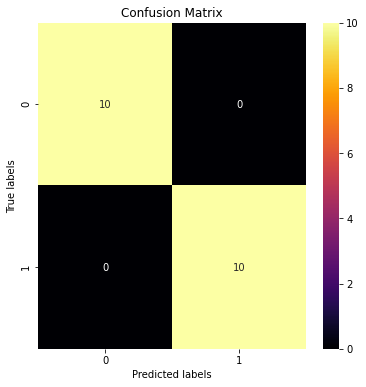

In [152]:
#plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, fmt='g', cmap = 'inferno')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')